In [1]:
#Import the libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import statsmodels
from statsmodels.formula.api import ols
from scipy.stats import kurtosis,skew
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df_kc_house = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [3]:
#Drop datasets
df_kc_house.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long','sqft_living15','sqft_lot15', 'waterfront', 'condition', 'grade'],axis=1, inplace=True)

In [4]:
# Look at the new Frame
df_kc_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000


In [5]:
#clean out outliers
df_kc_house[(np.abs(stats.zscore(df_kc_house)) < 3).all(axis=1)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
id,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,1987,98074
...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,2009,98103
6600060120,400000.0,4,2.50,2310,5813,2.0,2014,98146
1523300141,402101.0,2,0.75,1020,1350,2.0,2009,98144


In [6]:
# View it
df_kc_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000


In [7]:
# Take out anything that has over 10 bedrooms
df_kc_house=df_kc_house[df_kc_house['bedrooms']<=10]

In [8]:
# view it
df_kc_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
count,2.159500e+04,21595.000000,21595.000000,21595.000000,2.159500e+04,21595.000000,21595.000000,21595.000000
mean,5.402929e+05,3.371475,2.115802,2080.300579,1.510030e+04,1.494096,1971.003241,98077.949386
std,3.673845e+05,0.902643,0.768992,918.121966,4.141445e+04,0.539686,29.373926,53.514939
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068600e+04,2.000000,1997.000000,98118.000000
max,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000


In [9]:
# Show the list of 'price' from top to bottom
df_kc_house['price'].sort_values(ascending=False)[:50]

id
6762700020    7700000.0
9808700762    7060000.0
9208900037    6890000.0
2470100110    5570000.0
8907500070    5350000.0
7558700030    5300000.0
1247600105    5110000.0
1924059029    4670000.0
7738500731    4500000.0
3835500195    4490000.0
6065300370    4210000.0
6447300265    4000000.0
8106100105    3850000.0
853200010     3800000.0
2303900100    3800000.0
7397300170    3710000.0
4389201095    3650000.0
4217402115    3650000.0
2425049063    3640000.0
3625049042    3640000.0
4114601570    3600000.0
9253900271    3570000.0
2525049148    3420000.0
1118000320    3400000.0
3126059023    3400000.0
9362000040    3400000.0
9808100150    3350000.0
3625059043    3300000.0
1346300150    3300000.0
3625059152    3300000.0
6072800246    3300000.0
7524900003    3280000.0
8964800890    3200000.0
251500080     3200000.0
624069108     3200000.0
1068000375    3200000.0
7159200005    3200000.0
3025059124    3170000.0
333100295     3120000.0
2424049029    3100000.0
3025059093    3100000.0
4131900066   

In [10]:
# Show the list of 'price' from bottom to top
df_kc_house['price'].sort_values(ascending=True)[:50]

id
40000362       78000.0
8658300340     80000.0
3028200080     81000.0
3883800011     82000.0
1623049041     82500.0
7999600180     83000.0
1523049188     84000.0
2422049104     85000.0
1322049150     85000.0
1788900230     86500.0
9320900420     89000.0
1721801591     89950.0
2114700500     90000.0
4239400300     90000.0
1049010620     90000.0
1423049019     90000.0
2734100835     90000.0
795000765      92000.0
6929602721     95000.0
2724200705     95000.0
6198400218     95000.0
7335400215     95000.0
1788800630     96500.0
5128000010     99000.0
3751600030    100000.0
6146600170    100000.0
1900000195    100000.0
8856000545    100000.0
7813200115    100000.0
7224000980    100000.0
123039604     102500.0
723049326     104950.0
1788800610    105000.0
4311700120    105000.0
2023049218    105500.0
7211402105    106000.0
7899800045    107000.0
7899800450    107000.0
7129800036    109000.0
9200000050    109500.0
5381000048    110000.0
2853600155    110000.0
8018600880    110000.0
33614010

In [11]:
#Look for the information in the dataframe
df_kc_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 7129300520 to 1523300157
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21595 non-null  float64
 1   bedrooms     21595 non-null  int64  
 2   bathrooms    21595 non-null  float64
 3   sqft_living  21595 non-null  int64  
 4   sqft_lot     21595 non-null  int64  
 5   floors       21595 non-null  float64
 6   yr_built     21595 non-null  int64  
 7   zipcode      21595 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.5 MB


(array([3.095e+03, 7.996e+03, 5.171e+03, 2.789e+03, 1.153e+03, 4.470e+02,
        3.350e+02, 1.830e+02, 1.220e+02, 9.300e+01, 3.500e+01, 4.800e+01,
        3.900e+01, 1.800e+01, 1.400e+01, 1.900e+01, 1.100e+01, 5.000e+00,
        6.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  78000.,  268550.,  459100.,  649650.,  840200., 1030750.,
        1221300., 1411850., 1602400., 1792950., 1983500., 2174050.,
        2364600., 2555150., 2745700., 2936250., 3126800., 3317350.,
        3507900., 3698450., 3889000., 4079550., 4270100., 4460650.,
        4651200., 4841750., 5032300., 5222850., 5413400., 5603950.,
        5794500., 5985050., 6175600., 6366150., 6556700., 6747250.,
        6937800., 7128350., 7318900., 7509450., 7700000.]),
 <BarContainer object of 40 artist

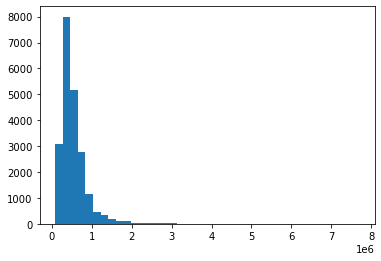

In [12]:
# Make a Histogram of the 'price' dataset
plt.hist(df_kc_house['price'],bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x152878d7430>,
 'caps': [<matplotlib.lines.Line2D at 0x152878d7af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x152878d70a0>],
 'medians': [<matplotlib.lines.Line2D at 0x152878e51f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x152878e5550>],
 'means': []}

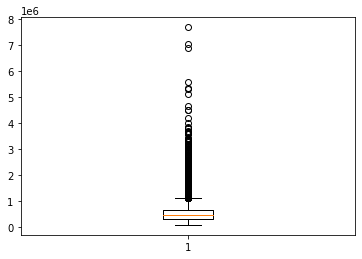

In [13]:
# Make a Boxplot of 'price' in the dataframe
plt.boxplot(df_kc_house['price'])

In [14]:
# Look at a list of "price"
df_kc_house['price']

id
7129300520    221900.0
6414100192    538000.0
5631500400    180000.0
2487200875    604000.0
1954400510    510000.0
                ...   
263000018     360000.0
6600060120    400000.0
1523300141    402101.0
291310100     400000.0
1523300157    325000.0
Name: price, Length: 21595, dtype: float64

In [15]:
# Rename y with the dataframe with values
y = df_kc_house['price'].values

In [16]:
# look at y
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [17]:
# Rename x with the dataframe a drop price list
x = df_kc_house.drop(['price'],axis=1).values 

In [18]:
# look at x
x

array([[3.0000e+00, 1.0000e+00, 1.1800e+03, ..., 1.0000e+00, 1.9550e+03,
        9.8178e+04],
       [3.0000e+00, 2.2500e+00, 2.5700e+03, ..., 2.0000e+00, 1.9510e+03,
        9.8125e+04],
       [2.0000e+00, 1.0000e+00, 7.7000e+02, ..., 1.0000e+00, 1.9330e+03,
        9.8028e+04],
       ...,
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 2.0000e+00, 2.0090e+03,
        9.8144e+04],
       [3.0000e+00, 2.5000e+00, 1.6000e+03, ..., 2.0000e+00, 2.0040e+03,
        9.8027e+04],
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 2.0000e+00, 2.0080e+03,
        9.8144e+04]])

In [19]:
# Look at the x shape
x.shape

(21595, 7)

In [20]:
#split x and y into x_
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .1)

In [21]:
# Make a LinearRegression
Reg=LinearRegression()

In [22]:
#Make a Linearregression fit
Reg.fit(x_train, y_train)

LinearRegression()

In [23]:
#check the head 
df_kc_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
id,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,1987,98074


In [24]:
#Check the drop dataset
df_kc_house.drop

<bound method DataFrame.drop of                price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020  

In [25]:
#LinearRegression score with test
Reg.score(x_test, y_test)

0.557008305297042

In [26]:
##LinearRegression score with train
Reg.score(x_train, y_train)

0.5582657989956428

In [27]:
# Make a DummyRegressor
dummy=DummyRegressor()

In [28]:
# make a DummyRegressor fit with train
dummy.fit(x_train, y_train)

DummyRegressor()

In [29]:
# Make a DummyRegressor with score of test
dummy.score(x_test, y_test)

-0.0004713231955426611

In [30]:
# Make y_pred using Reg.predict
y_pred = Reg.predict(x_test)

In [31]:
#Run it
y_pred

array([ 492078.34028083,  803180.18249749,  378028.26176256, ...,
       1190636.84591835,  339974.01562514,  758565.50042136])

In [32]:
# Run it
y_test

array([650000., 760000., 630000., ..., 560000., 270000., 486940.])

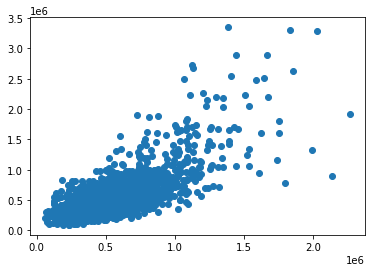

In [33]:
# create a scatter plot with the prediction and test 
plt.scatter(y_pred, y_test);

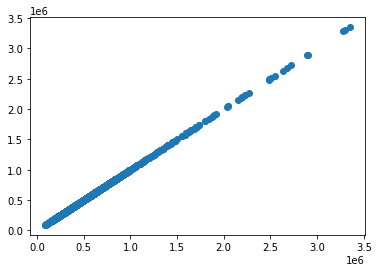

In [34]:
# create a scatter plot showing a homoscedasticity line
plt.scatter(y_test, y_test);

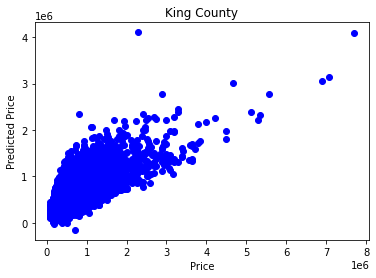

In [35]:
# make a scatter plot showing your prediction
plt.scatter(y_train,Reg.predict(x_train), color='blue')
plt.title("King County")
plt.xlabel("Price")
plt.ylabel("Predicted Price");

In [36]:
# Calculate the excess kurtosis using the fisher method. The alternative is Pearson which calculates regular kurtosis, and calculate skew
price_kurtosis = kurtosis(df_kc_house['price'], fisher= True)
sqft_lot_kurtosis = kurtosis(df_kc_house['sqft_lot'], fisher=True)

price_skew = skew(df_kc_house['price'])
sqft_lot_skew = skew(df_kc_house['sqft_lot'])

display("price_kurtosis:{:2}".format(price_kurtosis))
display("sqft_lot_kurtosis:{:2}".format(sqft_lot_kurtosis))

display("price_skew:{:2}".format(price_skew))
display("sqft_lot_skew:{:2}".format(sqft_lot_skew))

'price_kurtosis:34.53003616210525'

'sqft_lot_kurtosis:285.40449788899974'

'price_skew:4.0229494679793705'

'sqft_lot_skew:13.071125234531852'

In [37]:
# Create a variable kc_house containing the summary of a fit StatsModels ols model for a linear regression using kc_house to predict price
formula = 'price ~ sqft_lot+sqft_living'

kc_house = ols(formula, df_kc_house).fit()
kc_house_summ = kc_house.summary()

In [38]:
# add sqft_lot+sqft_living+bathrooms+bedrooms
all_formula = 'price ~ sqft_lot+sqft_living+bathrooms+bedrooms'

kc_house2 = ols(all_formula, df_kc_house).fit()
kc_house_summ2 = kc_house2.summary()

In [39]:
# Create a variable kc_house containing the summary of a fit StatsModels ols model for a linear regression using kc_house to predict price
formula = 'price ~ sqft_lot+sqft_living+bedrooms'

kc_house3 = ols(formula, df_kc_house).fit()
kc_house_summ3 = kc_house3.summary()

In [40]:
# Create a variable kc_house containing the summary of a fit StatsModels ols model for a linear regression using kc_house to predict price
formula = 'price ~ sqft_lot+sqft_living+bathrooms'

kc_house4 = ols(formula, df_kc_house).fit()
kc_house_summ4 = kc_house4.summary()

In [41]:
#Run it
kc_house_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.053e+04
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:03:06   Log-Likelihood:            -3.0001e+05
No. Observations:               21595   AIC:                         6.000e+05
Df Residuals:                   21592   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.437e+04   4405.979    -10.071      0.000    -5.3e+04   -3.57e+04
sqft_lot       -0.2916      0.044     -6.686      0.000      -0.377      -0.206
sqft_living   283.1647      1.967    143.933      0.000     279.309     287.021
==============================================================================
Omnibus:                    14735.257   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           534207.836
Skew:                           2.805   Prob(JB):                         0.00
Kurtosis:                      26.712   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Run it
kc_house_summ2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     5623.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:03:06   Log-Likelihood:            -2.9966e+05
No. Observations:               21595   AIC:                         5.993e+05
Df Residuals:                   21590   BIC:                         5.994e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.153e+04   7078.835     12.931      0.000    7.77e+04    1.05e+05
sqft_lot       -0.3880      0.043     -8.997      0.000      -0.473      -0.303
sqft_living   317.7500      3.158    100.608      0.000     311.559     323.940
bathrooms    7150.8366   3520.014      2.031      0.042     251.349    1.41e+04
bedrooms    -6.571e+04   2444.670    -26.877      0.000   -7.05e+04   -6.09e+04
==============================================================================
Omnibus:                    14203.416   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           468182.713
Skew:                           2.685   Prob(JB):                         0.00
Kurtosis:                      25.170   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

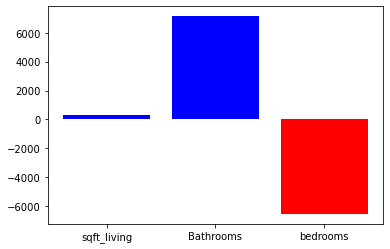

In [43]:
# Make a Barchart defining the postive and negative in home improvements
kc_house_summ2={'sqft_living':317.750, 'Bathrooms':7150.836, 'bedrooms':-6571}
plt.bar(range(len(kc_house_summ2)), list(kc_house_summ2.values()), align='center', color=['blue','blue','red'])
plt.xticks(range(len(kc_house_summ2)), list(kc_house_summ2.keys()))
plt.show()

In [44]:
# Run it
kc_house_summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7495.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:03:06   Log-Likelihood:            -2.9966e+05
No. Observations:               21595   AIC:                         5.993e+05
Df Residuals:                   21591   BIC:                         5.994e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.568e+04   6779.192     14.113      0.000    8.24e+04    1.09e+05
sqft_lot       -0.3927      0.043     -9.119      0.000      -0.477      -0.308
sqft_living   321.8897      2.413    133.394      0.000     317.160     326.620
bedrooms    -6.498e+04   2418.618    -26.867      0.000   -6.97e+04   -6.02e+04
==============================================================================
Omnibus:                    14181.541   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           466314.561
Skew:                           2.679   Prob(JB):                         0.00
Kurtosis:                      25.125   Cond. No.                     1.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

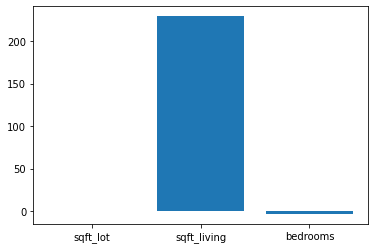

In [45]:
#Make a barchart to see how it looks
kc_house_summ3={'sqft_lot':-0.192, 'sqft_living':228.972, 'bedrooms':-3.334}
plt.bar(range(len(kc_house_summ3)), list(kc_house_summ3.values()), align='center')
plt.xticks(range(len(kc_house_summ3)), list(kc_house_summ3.keys()))
plt.show()

In [46]:
# Run it
kc_house_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     7022.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:03:06   Log-Likelihood:            -3.0001e+05
No. Observations:               21595   AIC:                         6.000e+05
Df Residuals:                   21591   BIC:                         6.001e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.905e+04   5233.640     -7.461      0.000   -4.93e+04   -2.88e+04
sqft_lot       -0.2971      0.044     -6.797      0.000      -0.383      -0.211
sqft_living   287.4295      2.999     95.848      0.000     281.552     293.307
bathrooms   -6670.2456   3539.947     -1.884      0.060   -1.36e+04     268.312
==============================================================================
Omnibus:                    14709.844   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           531235.698
Skew:                           2.799   Prob(JB):                         0.00
Kurtosis:                      26.645   Cond. No.                     1.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

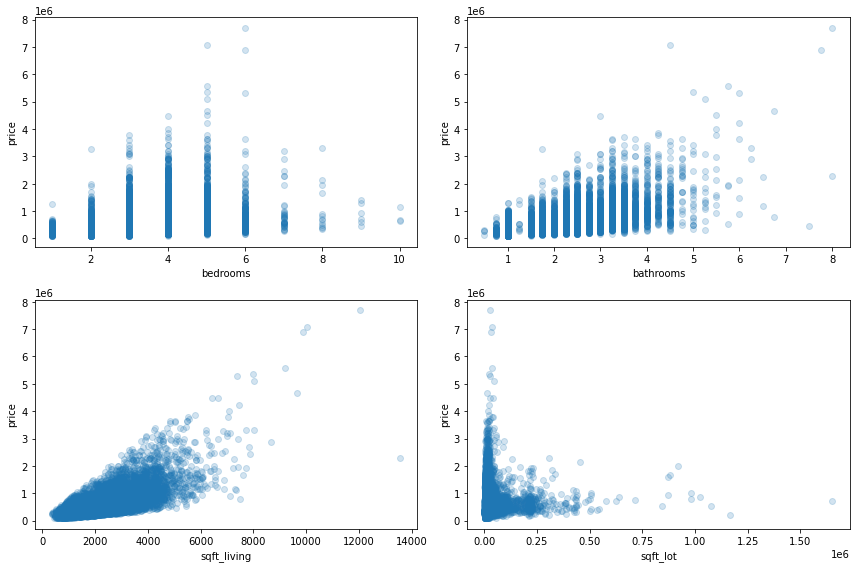

In [47]:
# Creat multiple subplots
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

xcont = df_kc_house.select_dtypes(('int64', 'float64')).columns.drop([ 'yr_built', 'price', 'zipcode', 'floors'])


for xcol, ax in zip(xcont, axes.flatten()):
    ax.scatter(df_kc_house[xcol], df_kc_house['price'], alpha=0.2)
    ax.set_xlabel(xcol)
    ax.set_ylabel("price")